# Support Vector Machine

In [2]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [4]:
data=pd.read_csv('datasets/cell_samples.csv')
data.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
data['Class'].value_counts()

Class
2    458
4    241
Name: count, dtype: int64

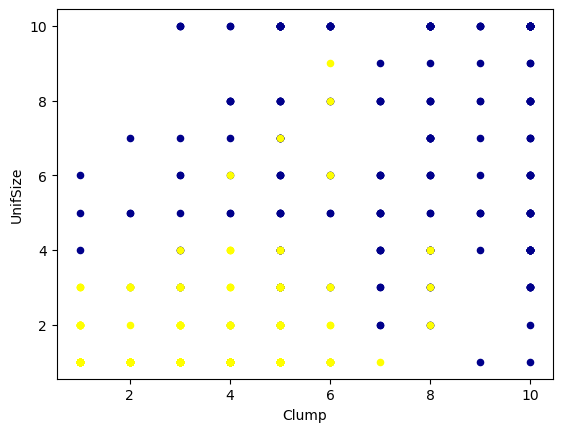

In [12]:
ax=data[data['Class']==4].plot(kind='scatter',x='Clump',y='UnifSize',color='DarkBlue')
data[data['Class']==2].plot(kind='scatter',x='Clump',y='UnifSize',color='Yellow',ax=ax)
plt.show()

# data and preprocessing

In [13]:
data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [19]:
data=data[pd.to_numeric(data['BareNuc'],errors='coerce').notnull()]
data['BareNuc']=data['BareNuc'].astype(int)
data['BareNuc'].value_counts()

BareNuc
1     402
10    132
2      30
5      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64

In [20]:
x=data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
y=data['Class']

In [21]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=4)
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((546, 9), (546,), (137, 9), (137,))

# Modeling
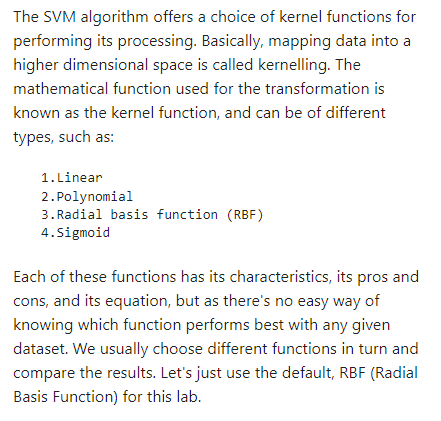

In [22]:
from sklearn import svm

In [23]:
model=svm.SVC(kernel='rbf')
model.fit(xtrain,ytrain)

SVC()

In [24]:
yhat=model.predict(xtest)
yhat

array([2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2, 2, 2, 4, 2,
       4, 4, 4, 4, 2, 2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 4,
       4, 2, 2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 2, 4, 4, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4,
       2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2,
       2, 2, 2, 2, 4], dtype=int64)

# Evaluation

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [26]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

Confusion matrix, without normalization
[[85  5]
 [ 0 47]]


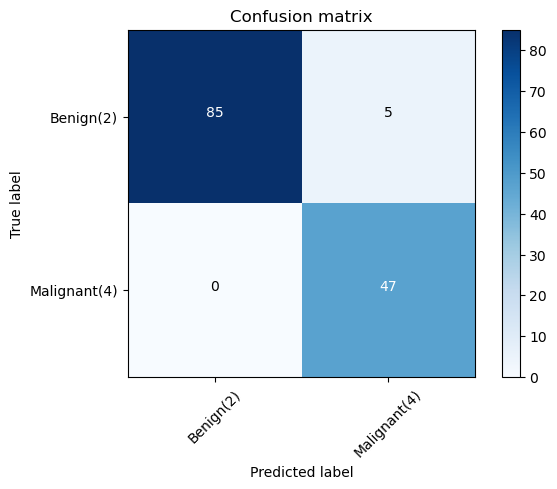

In [28]:
cnf_matrix = confusion_matrix(ytest, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(ytest, yhat))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')

In [31]:
from sklearn.metrics import f1_score
f1_score(ytest, yhat, average='weighted')

0.9639038982104676

In [32]:
from sklearn.metrics import jaccard_score
jaccard_score(ytest, yhat,pos_label=2)

0.9444444444444444

In [33]:
clf2 = svm.SVC(kernel='linear')
clf2.fit(xtrain, ytrain) 
yhat2 = clf2.predict(xtest)
print("Avg F1-score: %.4f" % f1_score(ytest, yhat2, average='weighted'))
print("Jaccard score: %.4f" % jaccard_score(ytest, yhat2,pos_label=2))

Avg F1-score: 0.9639
Jaccard score: 0.9444
